<a href="https://colab.research.google.com/github/Milafreire/WoMakersCode_DataAnalyst/blob/main/analise_eleicao_v04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
#%pip install matplotlib
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns
#%pip install plotly
import plotly.express as px
import plotly.graph_objs as go
import collections
from collections import defaultdict
#%pip install textblob
from textblob import TextBlob
#%pip install wordcloud
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

### Importando as bases

In [ ]:
df_trump = pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n') 
df_biden = pd.read_csv('hashtag_joebiden.csv', lineterminator='\n')

### Analise base

In [ ]:
df_trump["Candidate"] = "TRUMP"
df_biden["Candidate"] = "BIDEN"

In [ ]:
# renomeia para US tudo que for Estados Unidos
df_trump['country']=df_trump['country'].replace({"United States of America" : "US", "United States" : "US"})
df_biden['country']=df_biden['country'].replace({"United States of America" : "US", "United States" : "US"})

In [ ]:
Data_Mixed = pd.concat([df_trump,df_biden]) 
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head(3)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP


Quantos tweets temos para cada candidato?

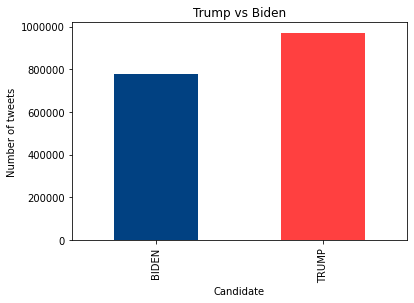

In [ ]:
# Quantos tweets temos para cada candidato?

colors = ['#014182','#FF4040']
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar(color = colors)
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # Remove notação científica
plt.show()

Quantos likes temos para cada candidato?

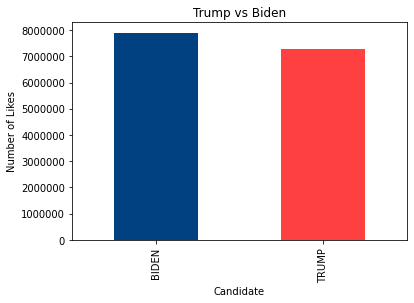

In [ ]:
# Total de likes para cada candidato

colors = ['#014182','#FF4040']
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar(color = colors)
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # Remove notação científica
plt.show()

#Embora o número de tweets para o
#Trump seja alto, o número de curtidas é alto para BIDEN

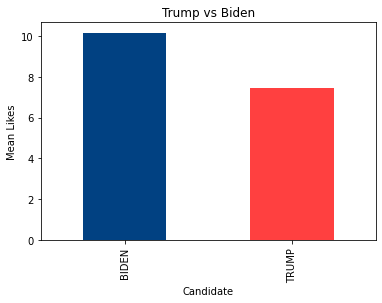

In [ ]:
# Média de likes para cada candidato

colors = ['#014182','#FF4040']
Data_Mixed.groupby('Candidate')['likes'].mean().plot.bar(color = colors)
plt.ylabel('Mean Likes')
plt.title('Trump vs Biden')
plt.show()

Paises que mais tweetaram?

In [ ]:
# renomeia para US tudo que for Estados Unidos
Data_Mixed['country']=Data_Mixed['country'].replace({"United States of America" : "US", "United States" : "US"})

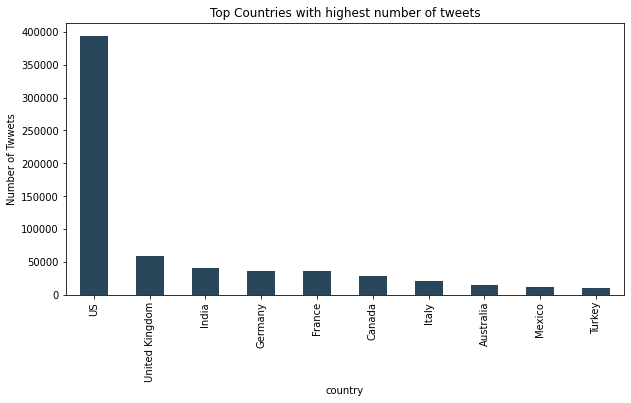

In [ ]:
# Paises com a maior quantidade de tweets 

plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar(color = '#29465b')
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show()

# Como esperado, mais Tweets são dos EUA, pois as eleições foram realizadas lá

País que teve mais tweets por candidato?

In [ ]:
# Lista top 10 dos países com mais tweets 
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()


In [ ]:
# Tweets por Biden e Trump em cada país
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().sort_values(ascending=False).reset_index()

tweet_dfs = tweet_df[tweet_df['country'].isin(top10Countries)]

tweet_dfs

,country,Candidate,tweet
0,US,TRUMP,213263
1,US,BIDEN,181137
2,United Kingdom,TRUMP,34743
3,United Kingdom,BIDEN,23308
4,Germany,TRUMP,22618
5,India,BIDEN,21532
6,France,TRUMP,20689
7,India,TRUMP,18559
8,Canada,TRUMP,16996
9,France,BIDEN,14610


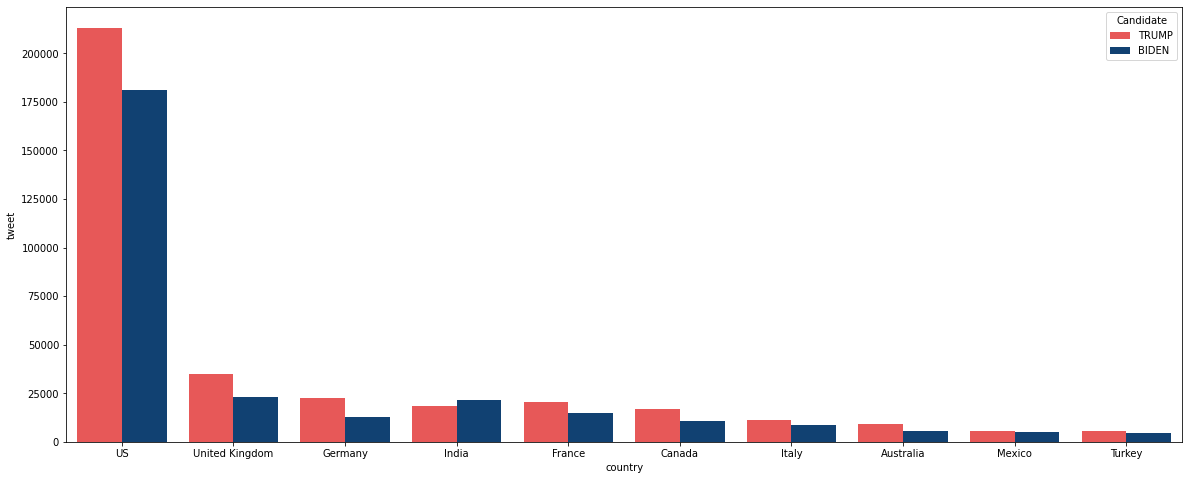

In [ ]:
#Top 10 top 10 dos países com mais tweets por Trump a Biden

plt.figure(figsize=(20,8))
colors_dict = {'BIDEN': '#014182', 'TRUMP': '#FF4040'}
sns.barplot(data=tweet_dfs,x='country',y='tweet',hue='Candidate', palette = colors_dict)
plt.show()


#Exceto na Índia, a maioria dos países tuíta mais sobre Trump

Quais estados tiveram mais tweets por candidato?

In [ ]:
# Lista dos 10 estados com maior numero de tweets 
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
# Tweets por Biden e Trump em cada estado
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().sort_values(ascending=False).reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df

,state,Candidate,tweet
0,California,TRUMP,31149
1,California,BIDEN,25817
2,England,TRUMP,24111
3,New York,TRUMP,22881
4,New York,BIDEN,21005
5,England,BIDEN,16743
6,Florida,TRUMP,16568
7,Texas,TRUMP,16491
8,Texas,BIDEN,14191
9,Florida,BIDEN,13284


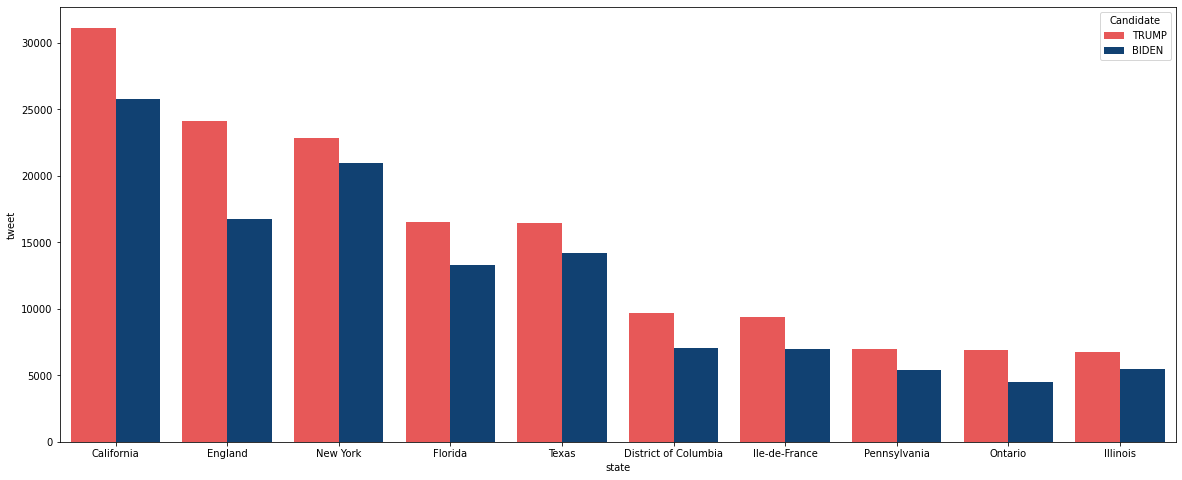

In [ ]:
#Top 10 estados que mais tem Tweet 

plt.figure(figsize=(20,8))
sns.barplot(data=state_df, x='state', y='tweet', hue='Candidate', palette = colors_dict)
plt.show()

#Mesmo aqui os tweets são mais para Trump do que para Biden

In [ ]:
state_df = Data_Mixed[Data_Mixed['country'] == 'US'].dropna(subset=['state_code']).groupby(['state_code','Candidate'])['tweet'].count().reset_index()
state_df = state_df.set_index(['Candidate', 'state_code']).unstack(level=0)

def getDiff(state):
    total = state[1] + state[0]
    diff = state[1] - state[0]  # trump - biden
    
    return diff/total

state_df = state_df.apply(getDiff, axis=1).reset_index().rename({0: 'diff'}, axis=1)


In [ ]:
fig = px.choropleth(state_df,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='diff',
                    color_continuous_scale=('#014182', '#FF4040'),
                    range_color=(-0.1,0.1),
                    color_continuous_midpoint=0,
                    )
fig.show()

Quais candidatos foram mais citados nos Swing States?

In [ ]:
# Lista Swing States

swingStates = ['Colorado',
                'Florida',
                'Iowa',
                'Michigan',
                'Nevada',
                'New Hampshire',
                'North Carolina',
                'Ohio',
                'Pennsylvania',
                'Virginia',
                'Wisconsin']

#https://www.polyas.com/election-glossary/swing-states

In [ ]:
# Contagem de tweets por estado:

swingStates_df = Data_Mixed[Data_Mixed['country']=='US'].groupby(['state','Candidate'])['tweet'].count().sort_values(ascending=False).reset_index()

# Seleção de dados dos Swing States:
    
swingStates_df = swingStates_df[swingStates_df['state'].isin(swingStates)]

swingStates_df

,state,Candidate,tweet
4,Florida,TRUMP,16559
7,Florida,BIDEN,13278
10,Pennsylvania,TRUMP,7011
13,Pennsylvania,BIDEN,5403
16,Ohio,BIDEN,4413
18,Ohio,TRUMP,3871
20,Colorado,TRUMP,3618
21,North Carolina,TRUMP,3415
25,Michigan,BIDEN,3074
26,North Carolina,BIDEN,3054


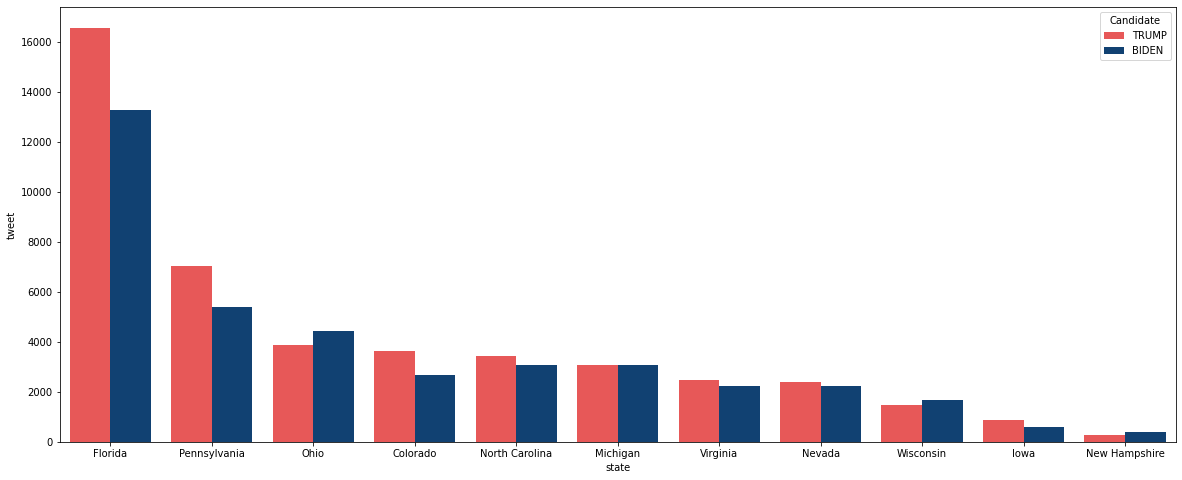

In [ ]:
# Tweets por Trump a Biden nos Swing states

plt.figure(figsize=(20,8))
sns.barplot(data = swingStates_df, x='state', y='tweet',hue='Candidate', palette = colors_dict)
plt.show()

### Sentimentos dos tweets por candidato


In [ ]:
def find_pol(review): ## função polarity que avalia o sentimento de cada tweet
    return TextBlob(review).sentiment.polarity

In [ ]:
# cria uma nova tabela
trump = df_trump[["Candidate","user_id","tweet","state","country"]]
biden = df_biden[["Candidate","user_id","tweet", "state","country"]] 

In [ ]:
trump["Sentiment Polarity"] = trump["tweet"].apply(find_pol)
trump.tail()

biden["Sentiment Polarity"] = biden["tweet"].apply(find_pol)
biden.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,user_id,tweet,state,country,Sentiment Polarity
776881,BIDEN,3.873620e+08,Stop laying @CNN !\n#Paris and #London dont gi...,Ile-de-France,France,-0.50
776882,BIDEN,4.032819e+08,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,NaN,NaN,0.00
776883,BIDEN,7.819183e+17,L'OTAN va sortir de sa léthargie et redevenir ...,NaN,France,0.00
776884,BIDEN,5.293315e+08,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,NaN,NaN,0.25
776885,BIDEN,5.863863e+08,"Ik moet zeggen dat ik #Biden ""the lesser of tw...",NaN,NaN,0.00


In [ ]:
trump["Expression Label"] = np.where(trump["Sentiment Polarity"]>0, "positive", "negative")
trump["Expression Label"][trump["Sentiment Polarity"]==0]="Neutral"
trump.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,user_id,tweet,state,country,Sentiment Polarity,Expression Label
970914,TRUMP,3.427951e+09,@PelleX @Mikerger @spiegelbilderz_ @BertiFranz...,NaN,NaN,0.000000,Neutral
970915,TRUMP,3.245258e+09,JOE BIDEN WHY JOE BIDEN DID WINNED ?? TRUMP TR...,NaN,NaN,-0.150000,negative
970916,TRUMP,9.866108e+17,#AfD|ler reagieren panisch bis hysterisch auf ...,NaN,NaN,0.000000,Neutral
970917,TRUMP,7.687811e+08,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",NaN,NaN,0.130556,positive
970918,TRUMP,4.519791e+08,OK just had to do it !\n#Trump #CatapultTrump ...,NaN,NaN,0.625000,positive


In [ ]:
biden["Expression Label"] = np.where(biden["Sentiment Polarity"]>0, "positive", "negative")
biden["Expression Label"][biden["Sentiment Polarity"]==0]="Neutral"
biden.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,user_id,tweet,state,country,Sentiment Polarity,Expression Label
776881,BIDEN,3.873620e+08,Stop laying @CNN !\n#Paris and #London dont gi...,Ile-de-France,France,-0.50,negative
776882,BIDEN,4.032819e+08,Ωχ ελπίζω να μη μας βγει σαν τους οπαδούς του...,NaN,NaN,0.00,Neutral
776883,BIDEN,7.819183e+17,L'OTAN va sortir de sa léthargie et redevenir ...,NaN,France,0.00,Neutral
776884,BIDEN,5.293315e+08,🌎\n\n“#congiuntifuoriregione”\n\n‘Sono felice ...,NaN,NaN,0.25,positive
776885,BIDEN,5.863863e+08,"Ik moet zeggen dat ik #Biden ""the lesser of tw...",NaN,NaN,0.00,Neutral


In [ ]:
#grafico Trump

new1 = trump.groupby('Expression Label').count()
x = list(new1['Sentiment Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'gray'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Biden

new1 = biden.groupby('Expression Label').count()
x = list(new1['Sentiment Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = 'gray'
df['color'][1] = 'red'
df['color'][2] = 'green'

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 descartando todos os tweets com polaridade neutra de ambos os conjuntos de dados para equilibrar os dados igualmente. 


In [ ]:
# Trump
reviews1= trump[trump['Sentiment Polarity'] == 0.0000]
print(reviews1.shape)

cond1= trump['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump.drop(trump[cond1].index, inplace = True)
print(trump.shape)




(532181, 7)
(438738, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
reviews2= biden[biden['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2= biden['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden.drop(biden[cond2].index, inplace = True)
print(biden.shape)

(440554, 7)
(336332, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Balanceando os dados

In [ ]:

#  Trump
np.random.seed(10)
remove_n =102730
drop_indices = np.random.choice(trump.index, remove_n, replace=False)
df_subset_trump = trump.drop(drop_indices)
df_subset_trump.shape



(336008, 7)

In [ ]:
# biden
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(biden.index, remove_n, replace=False)
df_subset_biden = biden.drop(drop_indices)
print(df_subset_biden.shape)

(336008, 7)


Distribuição do sentimento por candidato

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



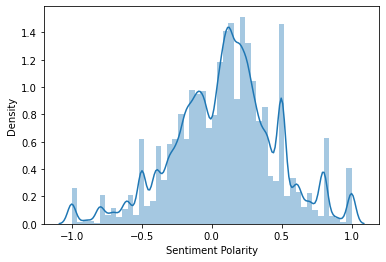

In [ ]:
#trump
sns.distplot(df_subset_trump['Sentiment Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



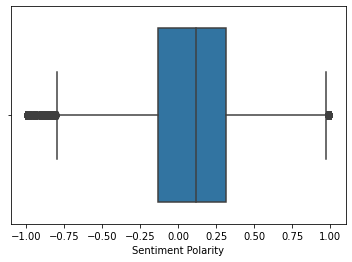

In [ ]:
sns.boxplot(df_subset_trump['Sentiment Polarity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



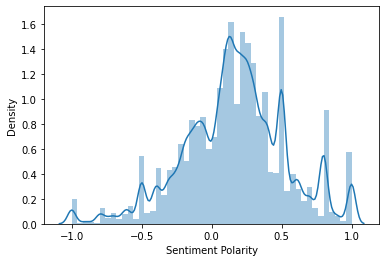

In [ ]:
#biden
sns.distplot(df_subset_biden['Sentiment Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



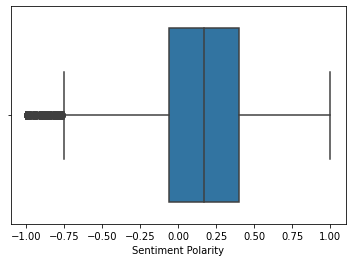

In [ ]:
sns.boxplot(df_subset_biden['Sentiment Polarity'])
plt.show()

In [ ]:

# analisando os dados para prever as eleições dos EUA, analisando o número de sentimentos positivos e negativos em ambas os candidatos


count_1 = df_subset_trump.groupby('Expression Label').count()
print(count_1)

negative_per1 = (count_1['Sentiment Polarity'][0]/1000)*10
positive_per1 = (count_1['Sentiment Polarity'][1]/1000)*100

count_2 = df_subset_biden.groupby('Expression Label').count()
print(count_2)

negative_per2 = (count_2['Sentiment Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment Polarity'][1]/1000)*100

Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

                  Candidate  user_id   tweet  state  country  \
Expression Label                                               
negative             123616   123616  123616  45851    59255   
positive             212392   212392  212392  78802   103731   

                  Sentiment Polarity  
Expression Label                      
negative                      123616  
positive                      212392  
                  Candidate  user_id   tweet  state  country  \
Expression Label                                               
negative              98036    98036   98036  35781    46308   
positive             237972   237972  237972  89156   115760   

                  Sentiment Polarity  
Expression Label                      
negative                       98036  
positive                      237972  


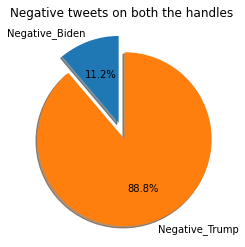

In [ ]:
labels =  ['Negative_Biden', 'Negative_Trump'] 
sizes = lis_neg
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

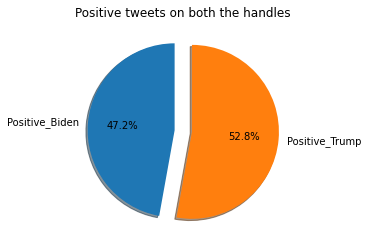

In [ ]:
labels =  ['Positive_Biden', 'Positive_Trump'] 
sizes = lis_pos
explode = (0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Positive tweets on both the handles')
plt.show()

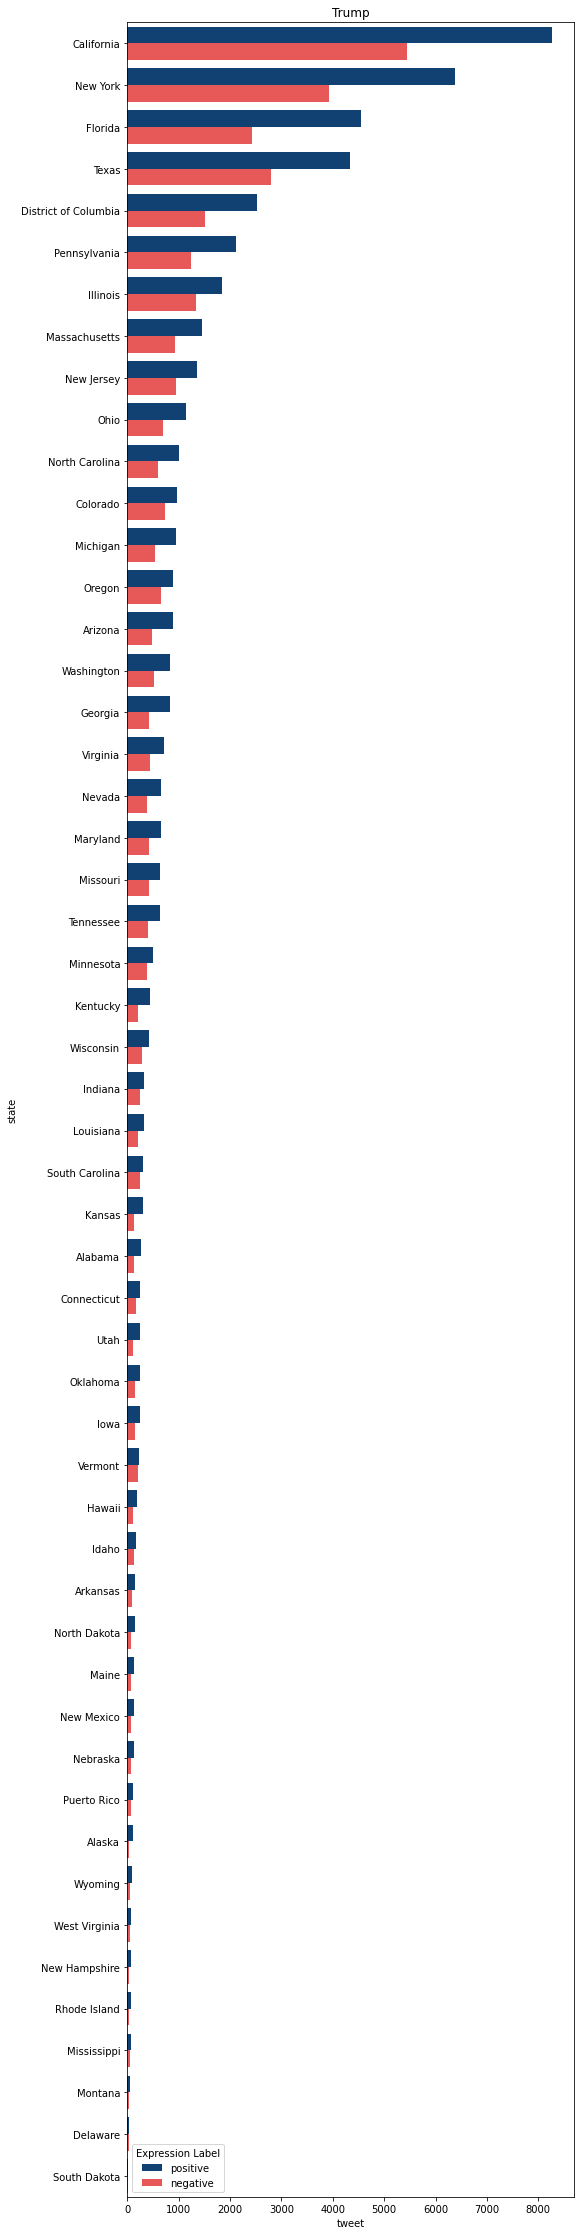

In [ ]:
# analisando o número de sentimentos positivos e negativos do Trump por estado

count_3 = df_subset_trump[df_subset_trump['country'] == 'US'].groupby(['state','Expression Label']).count().sort_values(ascending=False,by='tweet').reset_index()

plt.figure(figsize=(8,40))
colors_dict2 = {'positive': '#014182', 'negative': '#FF4040'}
sns.barplot(data=count_3,x='tweet',y='state', hue='Expression Label', palette = colors_dict2)
plt.title('Trump')
plt.show()

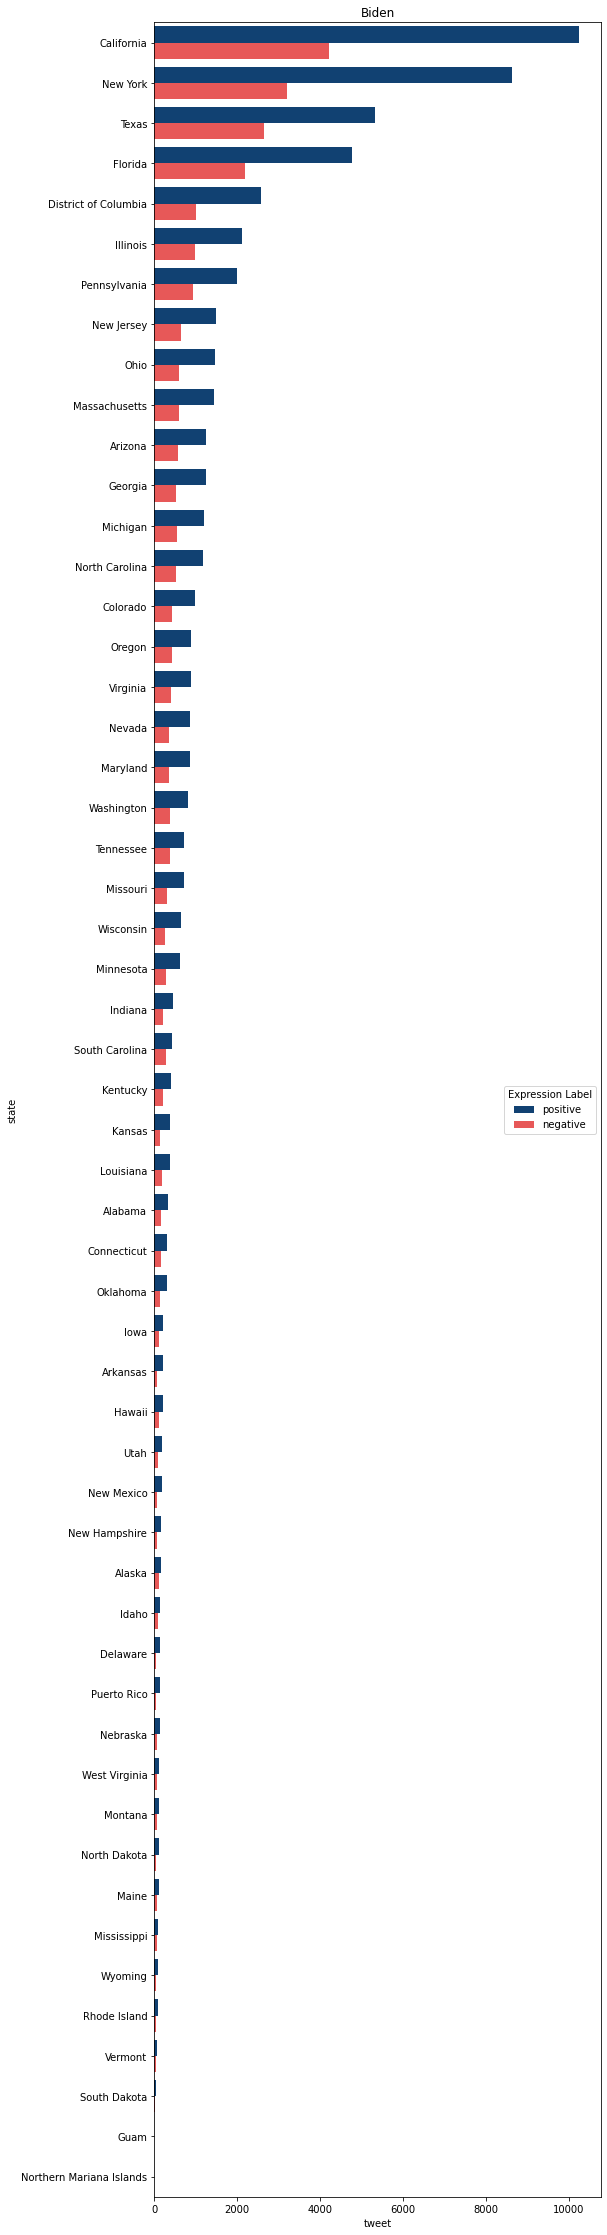

In [ ]:
# analisando o número de sentimentos positivos e negativos do Biden por estado

count_4 = df_subset_biden[df_subset_biden['country'] == 'US'].groupby(['state','Expression Label']).count().sort_values(ascending=False,by='tweet').reset_index()

plt.figure(figsize=(8,40))
colors_dict2 = {'positive': '#014182', 'negative': '#FF4040'}
sns.barplot(data=count_4,x='tweet',y='state', hue='Expression Label', palette = colors_dict2)
plt.title('Biden')
plt.show()